In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitterapi import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_users = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for user in (target_users):
    # Counter
    counter = 1
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            print("Tweet %s: %s" % (counter, tweet["text"]))
        
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
        
            # Add sentiments for each tweet into an array
            sentiments.append({"News Agency": user,
                                "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
            # Add to counter 
            counter = counter + 1



Tweet 1: RT @BBC_HaveYourSay: NHS at 70: We want your stories and memories of the #NHS from across the decades. Everyone from patients to doctors ar…
Tweet 2: IS 'Beatles duo' complaints anger murdered David Haines's daughter https://t.co/fSB2vzlxuu
Tweet 3: RT @BBCLondonNews: Man finds 'glistening' jewelled ring on London train https://t.co/g4uQpYVjZA https://t.co/MpiyoQ03t8
Tweet 4: RT @BBCSport: Former British boxing champion Chris Edwards has died at the age of 41.
https://t.co/1xhQwEeUDW https://t.co/WRC7zfykVO
Tweet 5: RT @BBCWorld: There's a good reason why this woman was asked to play the flute during brain surgery 🧠 https://t.co/5SjPgUBZ77
Tweet 6: University of Oxford 'sexist' alumni invite criticised https://t.co/nBHmGz6jEQ
Tweet 7: Actor Eddie Redmayne, who played Stephen Hawking in The Theory of Everything, to give reading at physicist's funera… https://t.co/uSV397t5jM
Tweet 8: Teachers raise prospect of national strike over pay https://t.co/awjrrajhlT
Tweet 9: RT @BBCWorl

Tweet 81: Prince of Wales 'deeply moved' in televised Easter message https://t.co/rXXzRn4dqj
Tweet 82: 'Sugar baby' students sell their company to fund studies https://t.co/sRqrG7mWLV
Tweet 83: Manchester Arena bombing: Compulsory first aid training call https://t.co/xwuXAa3VKG
Tweet 84: Car hire cost clean-up continues https://t.co/eYHB4QL0NZ
Tweet 85: Hospital's 'artificial feeding' letter to mothers criticised https://t.co/KVsmjNLQM9
Tweet 86: 'Unjustifiably high salaries' paid by some academies https://t.co/hg4n6eosCR
Tweet 87: Friday's Guardian: "Outcry as GKN falls to hostile takeover" #tomorrowspaperstoday #bbcpapers (via @hendopolis) https://t.co/igAZYWQxUX
Tweet 88: Friday's Sun: "We’ll fight each other on the beaches" #tomorrowspaperstoday #bbcpapers (via @hendopolis) https://t.co/qFcyw2jYhB
Tweet 89: Friday's Mirror: "Poison spy daughter talks" #tomorrowspaperstoday #bbcpapers (via @hendopolis)  https://t.co/gjbdG6dTDB
Tweet 90: Friday's Mail: "An abuse of capitalism" #tomor

Tweet 61: Office responsible for vetting Trump appointees plagued by personnel problems, report says https://t.co/hvlik6acz0 https://t.co/x6fKEgI5pv
Tweet 62: Two ISIS fighters from cell known for beheading hostages break their silence https://t.co/Sobj55rums https://t.co/ZLEw7hiXlL
Tweet 63: Delta landing gear catches fire shortly after landing in Atlanta https://t.co/3HwOuFXOt9 https://t.co/OZHLp07Csa
Tweet 64: Grace VanderWaal: The 14-year-old pop star with an "old soul" sound https://t.co/3FWueaxVzd https://t.co/UwosfPbfb7
Tweet 65: Who is invited to the royal wedding? Guest list details emerge https://t.co/4MeL29617Y https://t.co/za3Blh1WPL
Tweet 66: Concern over Russian ships lurking around vital undersea cables https://t.co/NxDA4il9l1 https://t.co/lYc8wC5dzc
Tweet 67: Nortre Dame defeats UConn with buzzer shot with 1 second left in OT https://t.co/l132yyFAkC https://t.co/tWd7KstzNc
Tweet 68: After bodies found in mine, man arrested in teens' deaths https://t.co/hTIMmRReII https:

Tweet 21: Body camera shows officer threatened to shoot Alton Sterling within seconds https://t.co/g0tu4eBFor https://t.co/5hdQQ0rvOX
Tweet 22: It took Baton Rouge police Officer Salamoni Blane less than 90 seconds to shoot Alton Sterling, but police took nea… https://t.co/O4m1DNVgLC
Tweet 23: UK told to pull more diplomatic staff from Russia https://t.co/MEmRVCZlnD https://t.co/pChK7Vt4td
Tweet 24: Malala Yousafzai returns to hometown in Pakistan https://t.co/HNwLQvhO8Q https://t.co/5LxTbSobJh
Tweet 25: The UN calls for an inquiry after Gaza's most violent day in 4 years https://t.co/tp4asuFMrj https://t.co/90uWE3qBUv
Tweet 26: Dr. Bennet Omalu, a pioneering pathologist credited with discovering CTE, spoke Friday about the findings of his th… https://t.co/MIqPiRqDbM
Tweet 27: Do you dream of escaping to the country and running your own bookstore? There's an Airbnb for that… https://t.co/zZBoaLyoHr
Tweet 28: About 2.5% of people who went to the doctor in the week ending March 24 had fl

Tweet 81: The attorneys for the family of Alton Sterling are speaking in Baton Rouge, Louisiana, following the police press c… https://t.co/p8AJCD4fPj
Tweet 82: The White House is frustrated with the EPA's Scott Pruitt, the already embattled Cabinet secretary who is under scr… https://t.co/Bk5ioNiNhA
Tweet 83: President Donald Trump has issued a proclamation designating April as National Sexual Assault Awareness month… https://t.co/kJLTw5PY4D
Tweet 84: How Steve Bannon used Cambridge Analytica to further his alt-right vision for America https://t.co/iB1mHKZT7z https://t.co/uY8u1AbqFj
Tweet 85: Jim Carrey has been trolling Trump and the GOP with paintings. Here are the top 11 https://t.co/MHqgAuAyf7 https://t.co/L2Zlql8mD2
Tweet 86: Walmart is in the early stages of talks to buy the health insurance giant Humana, according to a Wall Street Journa… https://t.co/VIggyj5nji
Tweet 87: BREAKING: Baton Rouge Police Officer Blane Salamoni, one of two officers involved in the fatal shooting of 

Tweet 61: 'Roseanne' revival scores renewal at ABC, report says https://t.co/qClDpNbAeb
Tweet 62: Jury 'convinced' Noor Salman knew of Pulse nightclub attack, but had 'no option' but to acquit, foreman says https://t.co/TpkwDhyRnw
Tweet 63: .@RealCandaceO: “Hillary lost because she keeps insulting Americans and her solution to that is to keep insulting A… https://t.co/EPtgUEQvlg
Tweet 64: Ronald D. Vitello: “There’s wall under construction right now… We have plans for much more.” https://t.co/NpU7SOkSv4
Tweet 65: U.N. Holds Emergency Meeting on Gaza Clashes https://t.co/yAfMAjwqwV https://t.co/yY8WTZbMHF
Tweet 66: Actor @RealJamesWoods took to Twitter to denounce calls for repealing the Second Amendment. https://t.co/YOlWc6pbip https://t.co/ZO6PwFiRx9
Tweet 67: Blue moon to light up sky ahead of Easter https://t.co/GlO0XSBD3o
Tweet 68: Woman gets 5 years for illegally voting in 2016 presidential election https://t.co/vCnPRIE2b8
Tweet 69: .@LisaMarieBoothe: "All we've been hearing about

Tweet 41: RT @NYTMetro: The nanny who killed two children on the Upper West Side believed she was acting on a command from the Devil, a psychiatrist…
Tweet 42: Doctors: You’ve Detailed Your Last Wishes, but Doctors May Not See Them https://t.co/tBuzWxgZOJ
Tweet 43: His wife's therapist told her to write a letter to his therapist. Did that cross a line? https://t.co/cbhZfmBA0o
Tweet 44: Why do cracking knuckles make that sound? You might need a calculator to explain it. https://t.co/NduaA792O0
Tweet 45: Hope Hicks has left the building. Those left behind are wondering what happens now. https://t.co/hcrVO6Tk6K
Tweet 46: 5 times David Pecker and The National Enquirer have defended or championed President Trump https://t.co/6Q77qgM8KR
Tweet 47: There remains a strong correlation between marriage and economic class in the American higher education system https://t.co/eEOrW8YT06
Tweet 48: RT @nytfood: How Maida Heatter's famous East 62nd Street lemon cake came to be https://t.co/ZGpbqHQmjJ h

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[["News Agency", "Tweets Ago", "Date", "Compound", "Positive", "Neutral", "Negative"]]
print(sentiments_pd.shape)
sentiments_pd.head()

(500, 7)


,News Agency,Tweets Ago,Date,Compound,Positive,Neutral,Negative
0,@BBCNews,1,Sat Mar 31 15:10:17 +0000 2018,0.0772,0.053,0.000,0.947
1,@BBCNews,2,Sat Mar 31 14:40:27 +0000 2018,-0.8957,0.000,0.607,0.393
2,@BBCNews,3,Sat Mar 31 14:23:16 +0000 2018,0.0000,0.000,0.000,1.000
3,@BBCNews,4,Sat Mar 31 13:48:54 +0000 2018,0.0772,0.173,0.160,0.667
4,@BBCNews,5,Sat Mar 31 13:25:58 +0000 2018,0.6486,0.249,0.000,0.751


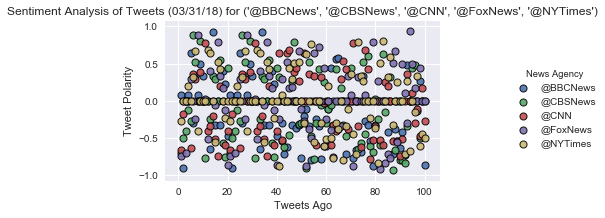

In [4]:
# Scatter plot for the sentiment of 100 tweets per target_user

# Set gray grid
sns.set(style='darkgrid')
# Set data for plot colors
_types= ["@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes"]

fg = sns.FacetGrid(sentiments_pd, hue='News Agency', hue_order=_types, aspect=1.61, legend_out = True)
fg.map(plt.scatter, 'Tweets Ago', 'Compound', 
       s=50, alpha=0.9, edgecolors="black", linewidth=1).add_legend()
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_users))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#plt.legend(loc="best")
plt.savefig("Tweets_Sentiment")
plt.show()

In [5]:
# Scatter plot for the sentiment of 100 tweets per target_user

# Set gray grid
sns.set(style='darkgrid')

sns.lmplot(x=["Tweets Ago"], y=["Compound"], data = sentiments_pd, fit_reg=False, hue="News Agency", legend=True)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_users))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc="best") # does this work?
plt.savefig("Tweets_Sentiment")
plt.show()

TypeError: '<' not supported between instances of 'str' and 'list'

In [ ]:
# Get the mean sentiment for each target_user, only compound sentiment is needed but I wanted to see all sentiment averages
mean_values = pd.pivot_table(sentiments_pd, index = ["News Agency"],
                                   values = ("Compound", "Positive", "Neutral", "Negative"), aggfunc=np.mean)

# Flattenning the header to clean up the dataframe for mean values
mean_sentiment = pd.DataFrame(mean_values.to_records())
mean_sentiment = mean_sentiment[["News Agency", "Compound", "Positive", "Neutral", "Negative"]]
mean_sentiment

In [ ]:
# Use DataFrame.plot() in order to create a bar chart of the data
sns.barplot(x = 'News Agency', y = 'Compound', data = mean_sentiment, label = 'News Agency')
plt.title("Overall Media Sentiment based on Twitter")
plt.xlabel("News Agency")
plt.ylabel("Tweet Polarity")
plt.savefig("News_Agency_Sentiment")
plt.show()